In [88]:
import pandas as pd
import DataLoading
import torch
import matplotlib.pyplot as plt
import NN_evaluation
import numpy as np 
import random

In [2]:
sc = "sc01"
period = "2030"
folder = "../Data/RTS24_AC_12w_ext_o_dummy/"
all_executions = DataLoading.list_executions(folder=folder,per = period,sc=sc)
te_s = 0.3
val_s = 0.4
dfs_in, dfs_out, dfs_inter = DataLoading.load_data_ext_out(folder, all_executions, period, sc, ["PowerFlow"])
dfs_inter_j = DataLoading.join_frames_inter_layer(dfs_inter)
dfs_inter_j = DataLoading.trim_columns_to_common(dfs_inter_j)
# Convert to pytorch tensors
ts_in, ts_out, ts_inter = DataLoading.split_tr_val_te_ext_out(dfs_in, dfs_out, dfs_inter_j, all_executions, te_s, val_s)
d_ft_in, d_ft_out, d_ft_inter,maxs = DataLoading.concat_and_normalize_ext_out(ts_in, ts_out, ts_inter, all_executions)

input_size = dfs_in["Network_Existing_Generation_Full"].shape[1]
inter_size = dfs_inter_j["Network_Existing_Generation_Full"].shape[1]

input_f_sc01_Network_Existing_Generation_Full_2030.csv
86
input_f_sc01_Network_Line_In_N_101_N_102_cac1_2030.csv
86
input_f_sc01_Network_Line_In_N_101_N_103_cac1_2030.csv
86
input_f_sc01_Network_Line_In_N_101_N_105_cac1_2030.csv
86
input_f_sc01_Network_Line_In_N_102_N_104_cac1_2030.csv
86
input_f_sc01_Network_Line_In_N_102_N_106_cac1_2030.csv
86
input_f_sc01_Network_Line_In_N_103_N_109_cac1_2030.csv
86
input_f_sc01_Network_Line_In_N_103_N_124_cac1_2030.csv
86
input_f_sc01_Network_Line_In_N_104_N_109_cac1_2030.csv
86
input_f_sc01_Network_Line_In_N_105_N_110_cac1_2030.csv
86
input_f_sc01_Network_Line_In_N_106_N_108_cac1_2030.csv
86
input_f_sc01_Network_Line_In_N_106_N_110_cac1_2030.csv
86
input_f_sc01_Network_Line_In_N_107_N_108_cac1_2030.csv
86
input_f_sc01_Network_Line_In_N_108_N_109_cac1_2030.csv
86
input_f_sc01_Network_Line_In_N_108_N_110_cac1_2030.csv
86
input_f_sc01_Network_Line_In_N_109_N_111_cac1_2030.csv
86
input_f_sc01_Network_Line_In_N_109_N_112_cac1_2030.csv
86
input_f_sc01_N

In [5]:
hyperloop_name = "RTS24_AC_12w_dummy_0.3_v0.4_PF_sa_rand_0_40"

df_losses = pd.read_csv(f"ResultsClusterRuns/Loss_results_csv/{hyperloop_name}.csv",index_col=0)
#df_losses = pd.read_csv(f"Loss_results_csv/{hyperloop_name}.csv",index_col=0)
cluster_run =True
f = df_losses.alpha ==0.0

loss_to_sort = "Te_l_mae"

[172, 258, 62, 38, 19, 9]


C:\Workdir\Programs\Miniconda\envs\jr23\lib\site-packages\torch\_tensor.py:852: RuntimeWarning: invalid value encountered in multiply
  return self.reciprocal() * other


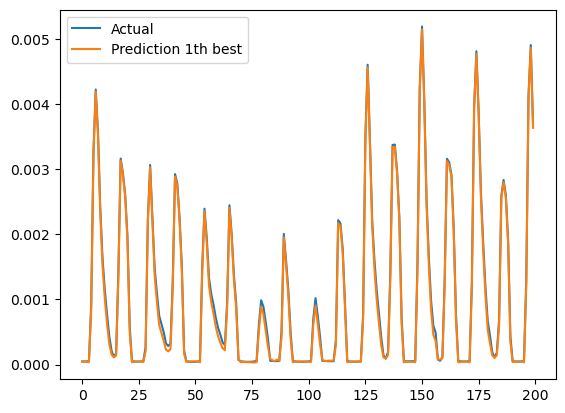

In [23]:
#Visualisation of multiple models in input order
ex = all_executions[0]


#ex_in = torch.nan_to_num(ts_in[data_part][ex]/maxs["in"])
ex_in = torch.nan_to_num(dfs_in[ex].to_numpy()/maxs["in"])
ex_out = dfs_out[ex].sum(axis=1).to_numpy()


s = 0
e=s+200
plt.plot(ex_out[s:e],label = "Actual")

for xth_best in [1]: 
    row = NN_evaluation.find_xthbest_model_params_from_df(df_losses[f],loss_to_sort,xth_best)
    m = NN_evaluation.create_model_and_load_state_from_row(row,input_size,inter_size,hyperloop_name,cluster_run=cluster_run)
    prediction = m(ex_in.float())[0].detach().numpy()
    plt.plot(prediction[s:e],label = f"Prediction {xth_best}th best")
plt.legend()

[172, 258, 62, 38, 19, 9]
[172, 258, 62, 38, 19, 9]


C:\Workdir\Programs\Miniconda\envs\jr23\lib\site-packages\torch\_tensor.py:852: RuntimeWarning: invalid value encountered in multiply
  return self.reciprocal() * other
C:\Workdir\Programs\Miniconda\envs\jr23\lib\site-packages\torch\_tensor.py:852: RuntimeWarning: invalid value encountered in multiply
  return self.reciprocal() * other


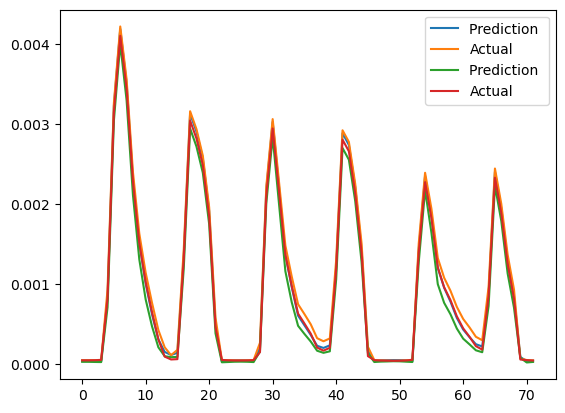

In [32]:
#Visualisation of multiple executions in input order
ex = all_executions[0]


#ex_in = torch.nan_to_num(ts_in[data_part][ex]/maxs["in"])

j = 2

s = 0
e=s+72


for ex_i in [0,1]:
    ex = all_executions[ex_i]
    row = NN_evaluation.find_xthbest_model_params_from_df(df_losses[f],loss_to_sort,xth_best)
    m = NN_evaluation.create_model_and_load_state_from_row(row,input_size,inter_size,hyperloop_name,cluster_run=cluster_run)
    ex_in = torch.nan_to_num(dfs_in[ex].to_numpy()/maxs["in"])
    ex_out = dfs_out[ex].sum(axis=1).to_numpy()
    prediction = m(ex_in.float())[0].detach().numpy()
    plt.plot(prediction[s:e],label = f"Prediction ")
    plt.plot(ex_out[s:e],label = f"Actual")

plt.legend()

[172, 258, 62, 38, 19]


C:\Workdir\Programs\Miniconda\envs\jr23\lib\site-packages\torch\_tensor.py:852: RuntimeWarning: invalid value encountered in multiply
  return self.reciprocal() * other


(array([ 58.,   2.,  10.,  59., 173., 124.,  63., 127., 170., 174., 178.,
         82.,  51.,  42.,  30.,  29.,  19.,  23.,  23.,  19.,  17.,  26.,
         17.,  23.,  16.,  19.,  16.,  11.,  14.,   9.,  13.,  15.,  15.,
         13.,   7.,   4.,   7.,   9.,   9.,  13.,   8.,  15.,   7.,   8.,
         11.,   3.,   9.,   9.,  11.,   9.,   9.,   1.,   6.,   8.,   2.,
         13.,   7.,  10.,   5.,   5.,   4.,   8.,   5.,   6.,   5.,   7.,
          6.,   9.,   6.,   7.,   1.,   2.,   2.,   3.,   2.,   5.,   9.,
          3.,  13.,   1.,   3.,  11.,   8.,   4.,   2.,   8.,   6.,   7.,
          6.,   8.,   6.,   7.,  17.,   6.,  12.,  13.,  22.,  17.,   9.,
         23.]),
 array([-2.55197570e-13,  9.08875716e-03,  1.81775143e-02,  2.72662715e-02,
         3.63550286e-02,  4.54437858e-02,  5.45325429e-02,  6.36213001e-02,
         7.27100573e-02,  8.17988144e-02,  9.08875716e-02,  9.99763287e-02,
         1.09065086e-01,  1.18153843e-01,  1.27242600e-01,  1.36331357e-01,
         1.454

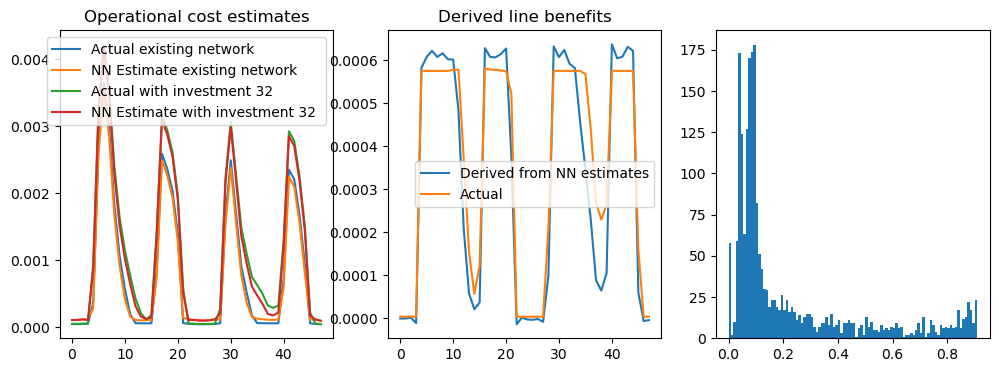

In [129]:
#Visualisation of multiple executions in input order
f = df_losses.alpha ==0.0
loss_to_sort = "Te_l_t_mse"
xth_best = 1
row = NN_evaluation.find_xthbest_model_params_from_df(df_losses[f],loss_to_sort,xth_best)
m = NN_evaluation.create_model_and_load_state_from_row(row,input_size,inter_size,hyperloop_name,cluster_run=cluster_run)

#ex_in = torch.nan_to_num(ts_in[data_part][ex]/maxs["in"])

l_idx = 32
ex = all_executions[l_idx]
negf = all_executions[0]


ex_in_e = torch.nan_to_num(dfs_in[ex].to_numpy()/maxs["in"])
ex_in_negf = torch.nan_to_num(dfs_in[negf].to_numpy()/maxs["in"])

prediction_e = m(ex_in_e.float())[0].detach().numpy()
prediction_negf = m(ex_in_negf.float())[0].detach().numpy()

actual_e = NN_evaluation.get_actual_from_dfs_out(ex,dfs_out)
actual_negf = NN_evaluation.get_actual_from_dfs_out(negf,dfs_out)

lb_est = prediction_negf- prediction_e
lb_actual = NN_evaluation.calculate_lb_from_dfs_out(dfs_out,ex)



#s= random.randint(0,len(actual_e))
s=0
e = s+48

fig, axs = plt.subplots(1,3,figsize = (12,4))

axs[0].plot(actual_e[s:e],label = "Actual existing network")
axs[0].plot(prediction_e[s:e],label = "NN Estimate existing network")
axs[0].plot(actual_negf[s:e],label = f"Actual with investment {l_idx}")
axs[0].plot(prediction_negf[s:e],label = f"NN Estimate with investment {l_idx} ")

axs[0].legend()
axs[0].set_title("Operational cost estimates")

axs[1].plot(lb_est[s:e],label = "Derived from NN estimates")
axs[1].plot(lb_actual[s:e],label = "Actual")
axs[1].legend()
axs[1].set_title(f"Derived line benefits")

axs[2].hist(lb_actual/actual_negf,bins= 100)



(array([960., 496., 168., 105.,  90.,  66.,  63.,  41.,  63., 132.]),
 array([-2.55197570e-13,  9.08875716e-02,  1.81775143e-01,  2.72662715e-01,
         3.63550286e-01,  4.54437858e-01,  5.45325429e-01,  6.36213001e-01,
         7.27100573e-01,  8.17988144e-01,  9.08875716e-01]),
 <BarContainer object of 10 artists>)

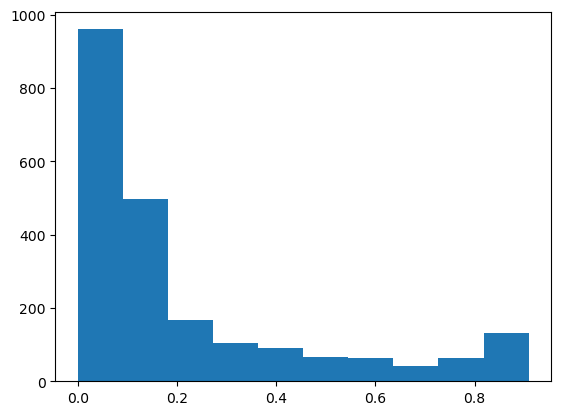